In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/碩二上/製造數據科學/期末報告/

/content/drive/My Drive/碩二上/製造數據科學/期末報告


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
day_data = pd.read_csv('dataset/day.csv', index_col='instant')

## Data preparation

In [ ]:
day_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_data.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


In [ ]:
day_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


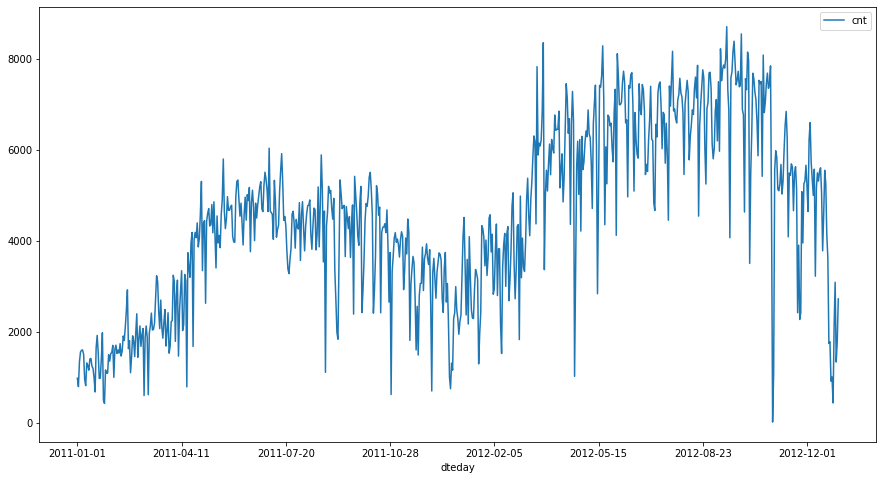

In [ ]:
day_data.plot(figsize=(15, 8), x='dteday', y='cnt')

In [ ]:
X_day = day_data.drop(['dteday', 'registered', 'casual', 'cnt'], axis=1)
y_day = day_data['cnt']

#### 迴歸分析看變數關係

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
X_cons = sm.add_constant(X_day)
model = sm.OLS(y_day, X_cons)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     261.9
Date:                Mon, 03 Jan 2022   Prob (F-statistic):          7.80e-243
Time:                        08:18:39   Log-Likelihood:                -5981.0
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     719   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.0031    240.218      6.115      0.0

## random forest 看變數重要性

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_day, y_day)

RandomForestRegressor()

In [ ]:
importance = list(model.feature_importances_)

In [ ]:
rf_FS = pd.DataFrame({'Columns': list(X_day.columns), 'Importance': importance}).sort_values(by=["Importance"], ascending=False)

In [ ]:
rf_FS

,Columns,Importance
7,temp,0.355579
1,yr,0.292030
8,atemp,0.120580
9,hum,0.068260
0,season,0.063589
10,windspeed,0.032198
2,mnth,0.027281
6,weathersit,0.018825
4,weekday,0.014539
5,workingday,0.003713


### 建立預測模型

全部變數進行預測

In [ ]:
train = day_data.iloc[:365]
test = day_data.iloc[365:]

In [ ]:
X_train = train.drop(['dteday', 'temp', 'workingday', 'mnth', 'registered', 'casual', 'cnt'], axis = 1)
y_train = np.log(train['cnt'])
X_test = test.drop(['dteday', 'temp', 'workingday', 'mnth', 'registered', 'casual', 'cnt'], axis = 1)
y_test = np.log(test['cnt'])

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

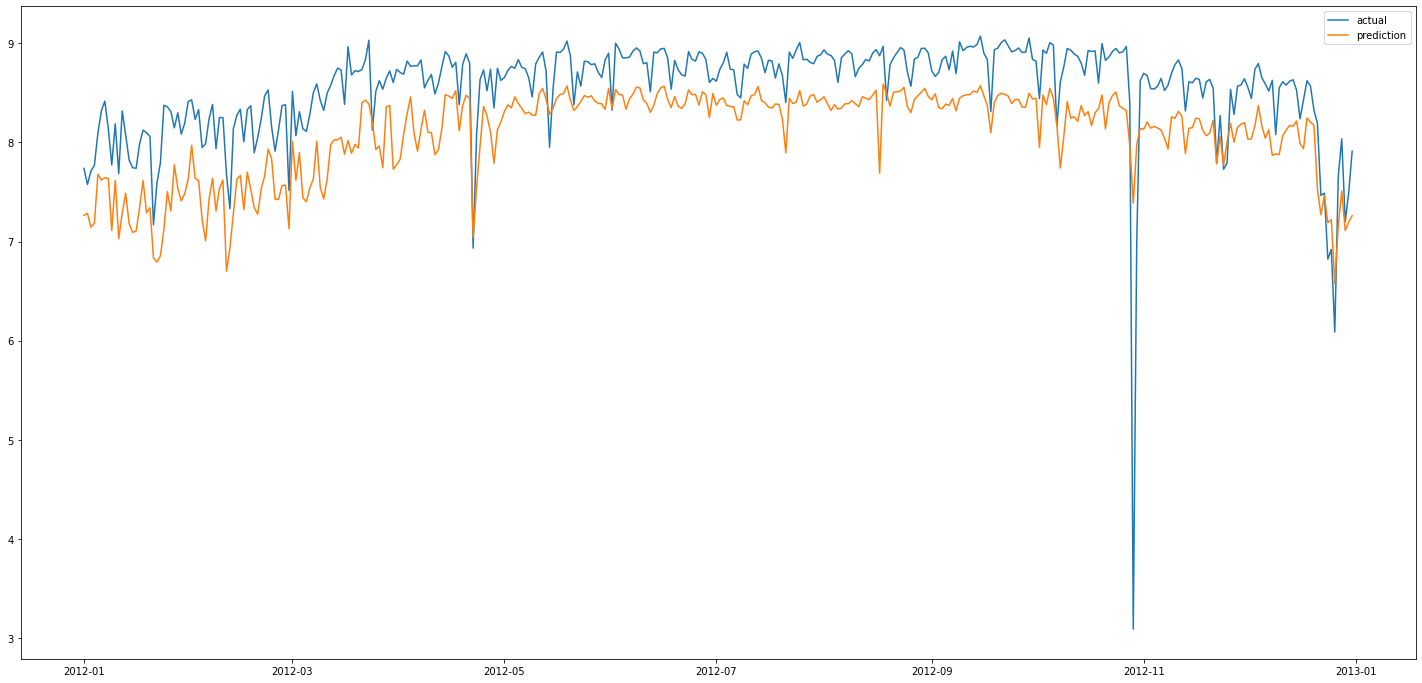

In [ ]:
plt.figure(figsize=(25, 12))
plt.plot(test['dteday'], y_test, label = 'actual')
plt.plot(test['dteday'], y_pred, label = 'prediction')
plt.legend()
plt.show()

## Hyperparameter Tuning
程式參考: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 20, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

### Time Series Prediction

In [ ]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [ ]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 111.4 KB


In [ ]:
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
# predict_start_date: the start date of predict data
# predict_end_date: the last date of predict data
class CntPrediction:
  def __init__(self, data, predict_start_date, predict_end_date):
    self.data = data
    self.predict_start_date = datetime.datetime.strptime(predict_start_date, "%Y-%m-%d")
    self.predict_end_date = datetime.datetime.strptime(predict_end_date, "%Y-%m-%d")
    self.split_date = self.predict_start_date

    self.pred_dates = []
    self.y_preds = []
    self.y_test = []

    self.MAE = 0
    self.MSE = 0
    self.RMSE = 0
    self.sMAPE = 0

  def get_train(self, date):
    delta = datetime.timedelta(days=365)
    start_date = date - delta
    return self.data.loc[(self.data['dteday'] < date) & (self.data['dteday'] >= start_date)]

  def predict(self):
    delta = datetime.timedelta(days=1)

    while self.split_date <= self.predict_end_date:
      self.pred_dates.append(self.split_date)

      train = self.get_train(self.split_date)
      test = self.data.loc[self.data['dteday'] == self.split_date]
      self.build_model(train, test)

      self.split_date += delta
    
    self.score()
    
  def build_model(self, train, test):
    X_train = train.drop(['dteday', 'registered', 'casual', 'cnt'], axis = 1)
    y_train = np.log(train['cnt'])
    X_test = test.drop(['dteday', 'registered', 'casual', 'cnt'], axis = 1)
    y_test = np.log(test['cnt'])
  
    rf_model = RandomForestRegressor(bootstrap=True,max_depth=10,max_features=3,min_samples_leaf=3,min_samples_split=8,n_estimators=100)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    self.y_test.append(y_test)
    self.y_preds.append(y_pred)

  def smape(self, y_test, y_preds):
    return round(np.mean(np.abs(y_preds - y_test) / ((np.abs(y_preds) + np.abs(y_test))/2))*100, 2)

  def score(self):
    self.MSE = mean_squared_error(self.y_test, self.y_preds)
    self.MAE = mean_absolute_error(self.y_test, self.y_preds)
    self.RMSE = np.sqrt(self.MSE)
    self.sMAPE = self.smape(y_test,y_pred)
  
    print('----------Performance---------')
    print('MAE = ', self.MAE)
    print('MSE = ', self.MSE)
    print('RMSE = ', self.RMSE)
    print('sMAPE = ', self.sMAPE)

In [ ]:
cnt_model = CntPrediction(day_data, '2012-01-01', '2012-12-31')
cnt_model.predict()

----------Performance---------
MAE =  0.22947146541418717
MSE =  0.15254870262710735
RMSE =  0.3905748361416892
sMAPE =  6.1


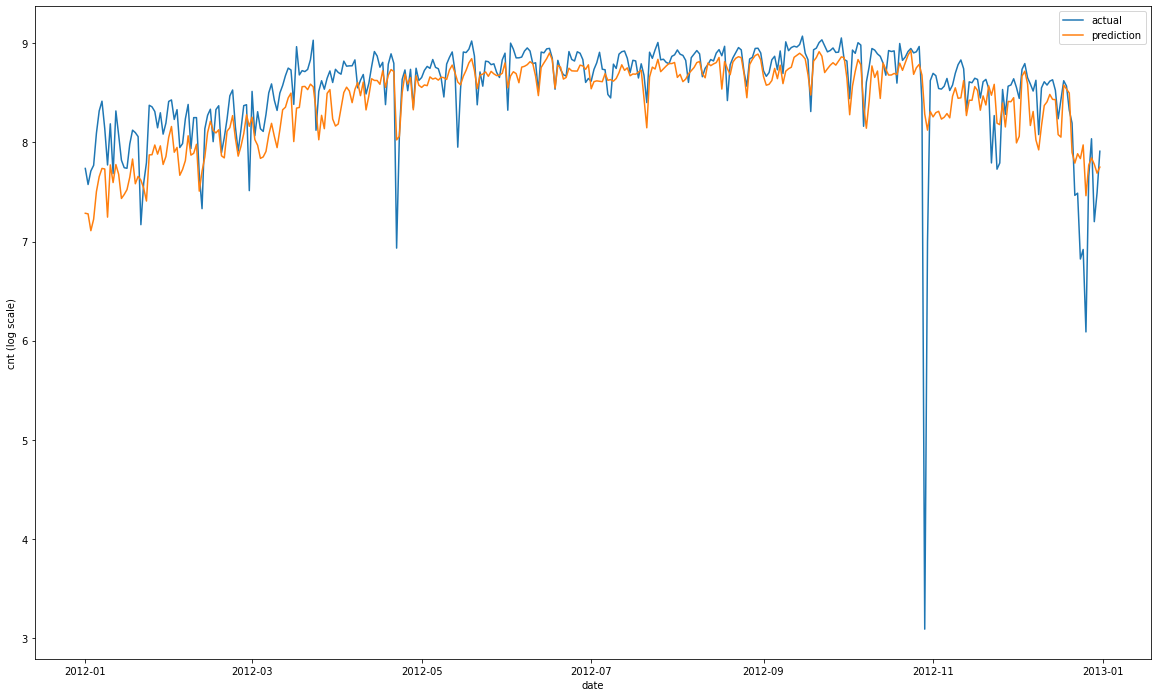

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(cnt_model.pred_dates, cnt_model.y_test, label = 'actual')
plt.plot(cnt_model.pred_dates, cnt_model.y_preds, label = 'prediction')
plt.xlabel('date')
plt.ylabel('cnt (log scale)')
plt.legend()
plt.show()

In [ ]:
cnt_model_1 = CntPrediction(day_data.drop(['temp', 'workingday'], axis=1), '2012-01-01', '2012-12-31')
cnt_model_1.predict()

----------Performance---------
MAE =  0.22080748401591402
MSE =  0.1504476767581734
RMSE =  0.38787585224936777
sMAPE =  6.1


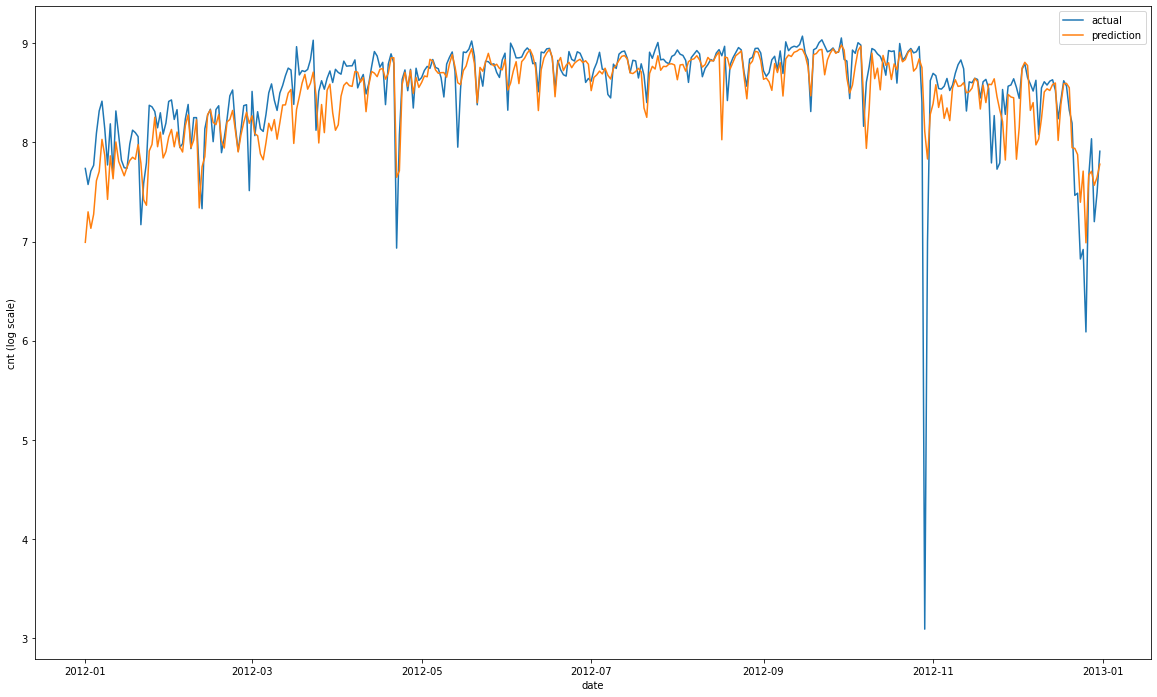

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(cnt_model_1.pred_dates, cnt_model_1.y_test, label = 'actual')
plt.plot(cnt_model_1.pred_dates, cnt_model_1.y_preds, label = 'prediction')
plt.xlabel('date')
plt.ylabel('cnt (log scale)')
plt.legend()
plt.show()